# `qNetworkDiscrete`

This network is a simple sequential network that takes a 1D vector and is able to learn a multi-valued function. This is useful and can act as a discrete Q-Network because, one can think of it as something that takes a 1D state, and returns a Q-value, one for each discrete action. So, lets see this in action:

In [2]:
cd ../src

/home/sankha/Documents/programs/ML/RLalgos/src


In [3]:
from lib.agents import qNetwork as qN
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from tqdm import tqdm_notebook as tqdm

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

First, let us create some dummy data, and see whether our network is able to detect it ...

In [4]:
X = np.random.rand(1000, 2) - 0.5
Y = np.array([
    X[:,0]*2 + X[:,1]*3,
    X[:,0]*5 + X[:,1]*6
]).T

print(X.shape, Y.shape)
Xt = torch.as_tensor(X.astype(np.float32)).to(device)
Yt = torch.as_tensor(X.astype(np.float32)).to(device)

(1000, 2) (1000, 2)


Let us create a Q-network and see wheter we are able to represent this function.

In [7]:
network = qN.qNetworkDiscrete(2, 2, layers=[10, 5], activations=[F.tanh, F.tanh], batchNormalization = False, lr=0.01).to(device)

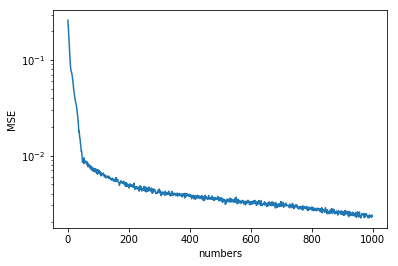

In [8]:
errors = []
for i in tqdm(range(1000)):
    y = network.forward( Xt, 0.1 )
    network.step(Yt, y)
    e = ((y - Yt)**2).mean()
    errors.append(e.cpu().detach().numpy())
    
errors = np.array(errors)
plt.plot(errors)
plt.yscale('log')
plt.xlabel('numbers')
plt.ylabel('MSE')
plt.show()